## Introduction: 

#### Read data set from Github repository and load them into pandas

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# uploading data to pandas

original_df = pd.read_csv('https://raw.githubusercontent.com/kuinkelarun/Quiz-Assignment-4/main/HDMA%20Boston%20Housing%20Data.csv', header=None)

#prints few lines of the sample table including the deader 

original_df.head(100)
# print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
1,1.0,0.221000004,0.221000004,0.8,5,2,no,no,no,no,3.900000095,0,no,no
2,2.0,0.265,0.265,0.921875,2,2,no,no,no,yes,3.200000048,0,no,no
3,3.0,0.372000008,0.247999992,0.92039801,1,2,no,no,no,no,3.200000048,0,no,no
4,4.0,0.32,0.25,0.860465116,1,2,no,no,no,no,4.300000191,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95.0,0.312000008,0.256000004,0.792207792,1,2,no,no,yes,no,1.799999952,0,no,no
96,96.0,0.33,0.31,0.580246914,1,2,no,no,no,yes,4.300000191,1,no,no
97,97.0,0.32,0.31,0.636363636,2,2,no,no,no,no,3.200000048,0,no,no
98,98.0,0.38,0.3,0.876470588,2,1,no,no,no,no,10.60000038,0,no,no


### Assigning column names

In [3]:
# make a copy of data set to preserve oridigal data set
df = original_df.copy()

# drop first column at position 0
df = df.drop(0)

# assign meaningful column names
df.columns = ['Applicant No.', 'Debt Pmt-Income Ratio', 'Housing Exp-Income Ratio', 'Loan-Prop Val Ratio', 'Cust Cr Score', 'Mtg Cr Score', 'Bad Cr Rec', 'Denied Mtg Ins', 'Self Emp', 'Single', 'URIA', 'Condo', 'Black', 'Deny']

#sample display
df.head()


,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,Bad Cr Rec,Denied Mtg Ins,Self Emp,Single,URIA,Condo,Black,Deny
1,1.0,0.221000004,0.221000004,0.8,5,2,no,no,no,no,3.900000095,0,no,no
2,2.0,0.265,0.265,0.921875,2,2,no,no,no,yes,3.200000048,0,no,no
3,3.0,0.372000008,0.247999992,0.92039801,1,2,no,no,no,no,3.200000048,0,no,no
4,4.0,0.32,0.25,0.860465116,1,2,no,no,no,no,4.300000191,0,no,no
5,5.0,0.36,0.35,0.6,1,1,no,no,no,no,3.200000048,0,no,no


### Aim to achieve the following by the end of the analysis

The goal of this project is to predict weather or not a given mortgage applicant is denied from getting a housing loan. There are several factors to consider, and the goal is to pick the attributes that are mostly influencial in determining the loan acceptance/deny and analyze them. The model that is going to be uses is "Binary Logistic Regression Model". 

Following steps will be taken to get predictions: 

- > Step - 1: Generating general statistics of the data
- > Step - 2: Perform EDA on the given data, and present any preliminary pretictions
- > Step - 3: Perform data preparation works, including any feature engineeging techniques if applied
- > Step - 4: Perform another EDA after the complition of data preparation steps
- > Step - 5: Present regression modeling works, and analyze them
- > Step - 6: Explain model selection criteria, identify the preferred model, compare and contrast its performance with other models, and explain and analyze the result of your testing 
- > Step - 7: Conclusion of your analysis

## Exploratory Data Analysis (EDA):

#### Looking at preliminary statistics

In [4]:
# getting a preliminary stat 

df.describe()

,Applicant No.
count,2381.000000
mean,1191.000000
std,687.479818
min,1.000000
25%,596.000000
50%,1191.000000
75%,1786.000000
max,2381.000000


Information obtained above does not give us much information on the data set. Lets move forward by checking the general information about the data set. 

In [20]:
# getting general info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 1 to 2381
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Applicant No.             2381 non-null   float64
 1   Debt Pmt-Income Ratio     2381 non-null   object 
 2   Housing Exp-Income Ratio  2381 non-null   object 
 3   Loan-Prop Val Ratio       2381 non-null   object 
 4   Cust Cr Score             2381 non-null   object 
 5   Mtg Cr Score              2381 non-null   object 
 6   Bad Cr Rec                2380 non-null   object 
 7   Denied Mtg Ins            2381 non-null   object 
 8   Self Emp                  2380 non-null   object 
 9   Single                    2381 non-null   object 
 10  URIA                      2381 non-null   object 
 11  Condo                     2381 non-null   object 
 12  Black                     2381 non-null   object 
 13  Deny                      2381 non-null   object 
dtypes: float

After looking at the above information, besides the applicant number, every other data types are non numeric. Looking at different attributes and the data set generated earlier, there are many attributes which are numeric.

### Changing data types of the most obvious attributes

The attributes Debt Pmt-Income Ratio, Housing Exp-Income Ratio, Loan-Prop Val Ratio, Cust Cr Score, Mtg Cr Score, URIA (unemployment rate in applicant's job industry), Condo are all of numeric data types. To gather some general stats of the data I believe it is best to change those data types from object to intiger, float or contineous depending on the attributes. 



In [5]:
# convert data types to_numeric

df[['Debt Pmt-Income Ratio', 'Housing Exp-Income Ratio', 'Loan-Prop Val Ratio', 'Cust Cr Score', 'Mtg Cr Score', 'URIA', 'Condo']] = df[['Debt Pmt-Income Ratio', 'Housing Exp-Income Ratio', 'Loan-Prop Val Ratio', 'Cust Cr Score', 'Mtg Cr Score', 'URIA', 'Condo']].apply(pd.to_numeric)


### Generating some histogram, barplots and box plots

In this section we will try to identify some initial relationships of the attributes, and try to generate our preliminary analytics by discovering patterns, trends and outliers.

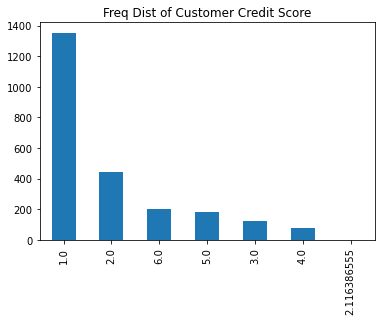

In [39]:
%matplotlib inline

bplt = df['Cust Cr Score'].value_counts().plot.bar(title = "Freq Dist of Customer Credit Score")
bplt;

There are a lot more loan borrowers with higher credit score than that of lower credit scores. 

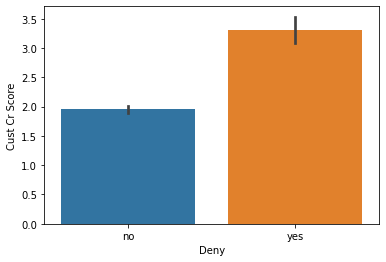

In [25]:
sns.barplot(x = 'Deny', y = 'Cust Cr Score', data = df)
plt.show()

Credit scores are rated between 1 - 6, 1 being the highest score. The above graph suggests that the individuals with higher credit score hare less likely to be denied.

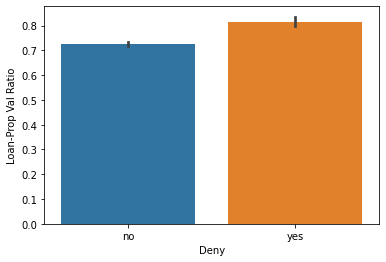

In [29]:
sns.barplot(x = 'Deny', y = 'Loan-Prop Val Ratio', data = df)
plt.show()

Lower loan to property valuation ratio is slightly better for the loan acceptance. Loan to property valuation ratio can be lower if the applicant is willing to pay more in down payments. This will decrease the ratio of an applicant's loan-propp ration.  More you pay in downpayment, you are more likely to be accepted for the mortgage. 

<AxesSubplot:xlabel='Black', ylabel='Count'>

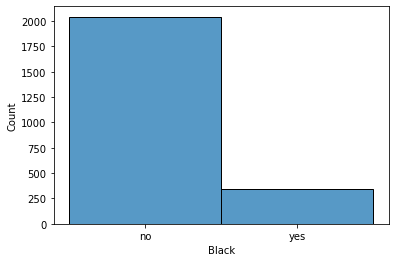

In [30]:
# histogram using seaburn

sns.histplot(df['Black'])

<AxesSubplot:>

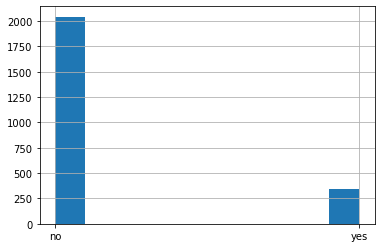

In [43]:
# histogram using mathplotlib
df["Black"].hist()

The number of black loan borrower is significantly lower than non black borrowers. 

<AxesSubplot:xlabel='Deny', ylabel='Count'>

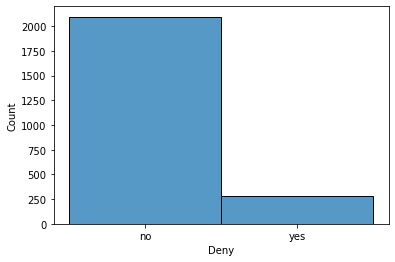

In [31]:
sns.histplot(df['Deny'])

The individuals who are denied loan are very few which is around 250. 

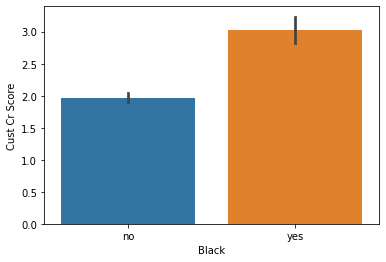

In [42]:
sns.barplot(x = 'Black', y = 'Cust Cr Score', data = df)
plt.show()

This diagram shows that there are more individual who identify themselves as "Black" have lower credit scores. Non black have higher credit score than that of those who identify themselves as "Black".

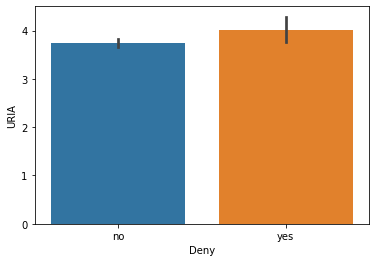

In [35]:
sns.barplot(x = 'Deny', y = 'URIA', data = df)
plt.show()

The unemployment rate in the applicant's industry slightly impacts in denial of loan. Higher the URIA, chances of not getting the loan for housing is higher.

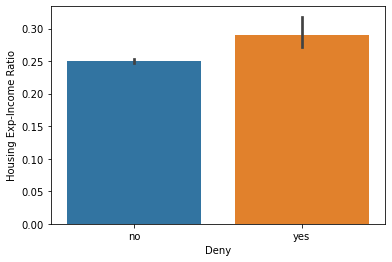

In [38]:
sns.barplot(x = 'Deny', y = 'Housing Exp-Income Ratio', data = df)
plt.show()

Housing expense to income ratio slightly impacts on loan acceptance/denial. Lower ratio means that the lower portion of household income goes into housing expenses, which seems to improve acceptance rate. 

In [44]:
# generating general ststistical data

df.describe()

,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,URIA,Condo
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,687.479818,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,2381.000000,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


In [50]:
# checking for null values

df.columns[df.isnull().any()]

Index(['Bad Cr Rec', 'Self Emp'], dtype='object')

In [63]:
#checking for unique values in al categorical data

df['Bad Cr Rec'].unique() 

array(['no', 'yes', nan], dtype=object)

"Bad Cr Rec" has some nan values which will be taken care in the next section. Also checked all other categorical variables, and there are not any extra characters in any of the attributes besides some nan in "Bad Cr Rec" and "Self Emp". Now that we know, the only special care that we need is for NaN values, we can focus only for those on next section when we deal with cleaning data.

#### Some of the following can be said after looking at the stats: 

The average borrowers have credit score of 1, which is a very good score. 

Debt payment to income ration has minimum value of 0, which is very interesting number. This kind of number is possible only if there is an individual who has never borrowed any money in the past. This is something we should look at. 

If you have a house, housing expense in inevitable. Housing expense to income ratio has minimum value of 0, which is a highly unlikely number in my belief because someone who is applying for loan must have some sort of income and there is housing expense. The ration might be very small if the income is very high, but there has to be some sort of ratio. This attribute needs further analysis. 


### Finding outliers:

Some of the things we identified during the general statistical analysis are as follows: 

Housing to Expense Ratio being zero (0), highly unlikely value. 

Applicants Debt Payment-Income Ratio being zero, another possible unlikely value. 

Some null values in "Bad Cr Rec" and "Self Emp" features. 

It is hard to draw effective conclusion on categorical attributes in this data set, which is why we will be transforming them into binary form so that we can analyze them more effectively or in more meaningful way.

#### We will be looking at different ways to address these issues in the next section. 

### EDA Conclusion: 

The initial analysis suggests that the highest factor that impacts the acceptance/denial of a loan application of an individual is the customer credit score. 

Lower housing expense to income ratio is another positive indicator to loan acceptance.

Lower loan to property valuation ratio also shows the sign of mortgage acceptance. 

Lower unemployment ratio in applicants job industry (URIA) also slightly impacts on loan acceptance/denial. Lower ratio the better.

Another factor to consider for analysis is the race of an individual applicant. Whether or not an applicant being black impacted on mortgage denial, will be the part of analysis after we have performed some data cleaning and feature engineering adjustments. 

## Data Preparation: 

This section involves the steps taken to address data integrity, cleaning data, usability issues with the data identified in the EDA section. This section also include any featire engineering techniques that may be necessary to work with the data.

### Taking care of Nan values: 

In [66]:
# checking the number of nan values 
df['Bad Cr Rec'].isna().sum()

1

In [149]:
# isolate the rows containing the null "bad cr rec" values

df[df['Bad Cr Rec'].isnull()]


,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,Bad Cr Rec,Denied Mtg Ins,Self Emp,Single,URIA,Condo,Black,Deny
2381,2381.0,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


In [67]:
# checking the number of nan values 
df['Self Emp'].isna().sum()

1

There are total of 2 nan values in out data set.

We have several ways to deal with nan values. We could simply replace them with 0, or we could replace them with mean, median, most_frequent or onstant in the case of numeric feature (attribute). As of this step through the process, we can remove the rows with NaN values, but we cannot replace them with any of the things we mentioned here because the attributes that has NaN values are categorical variables. 

We could replace them with forwardfill or backward fills too, also used for numerical data.

But, because there is only one row with null value, it is best to remove that row for our categorical data. 

In [68]:
# copy df to new data frame
new_df = df.copy()

In [71]:
# taking only the rows where "Bad Cr Rec" and "Self Emp" is not NaN
new_df = df[df['Bad Cr Rec'].notna()]
new_df = df[df['Self Emp'].notna()]

print(new_df.shape)
print(new_df)


(2380, 14)
      Applicant No.  Debt Pmt-Income Ratio  Housing Exp-Income Ratio  \
1               1.0                  0.221                     0.221   
2               2.0                  0.265                     0.265   
3               3.0                  0.372                     0.248   
4               4.0                  0.320                     0.250   
5               5.0                  0.360                     0.350   
...             ...                    ...                       ...   
2376         2376.0                  0.310                     0.250   
2377         2377.0                  0.300                     0.300   
2378         2378.0                  0.260                     0.200   
2379         2379.0                  0.320                     0.260   
2380         2380.0                  0.350                     0.260   

      Loan-Prop Val Ratio  Cust Cr Score  Mtg Cr Score Bad Cr Rec  \
1                0.800000            5.0           2.0 

In [72]:
# checking if there are still null values

new_df.columns[new_df.isnull().any()]

Index([], dtype='object')

### Converting categorical data to binary data

While looking at the categorical data in our data set, all of them are categorical features which answer yes/no type answers. Transforming these categorical data into binary form will give us more meaningful data to generate our analysis. 

Therefore, lets now convert our categorical data into binary form to make them more meaningful.

Because our goal of the project is to find out if mortgage denial has anything to do with following three things: 
- relationship between custoer credit score and mortgage denial
- relationship of individuals race (Black) and mortgage denial
- relationship between bad credit record of an individual and mortgage denial

Which is why we are only converting the features "Black", "Bad Cr Rec", and "Deny" into binary.


In [123]:
# copy of new df to bin_df which will have binary values for categorical data
bin_df = new_df.copy()
bin_df = pd.DataFrame(bin_df)


In [124]:
from sklearn import preprocessing

bin_df.head()

,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,Bad Cr Rec,Denied Mtg Ins,Self Emp,Single,URIA,Condo,Black,Deny
1,1.0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
2,2.0,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
3,3.0,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
4,4.0,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
5,5.0,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


### Converting "Black" data into Binary

The resulting display will mean: 

0 --> no

1 --> yes

In [125]:
# use the Pandas get_dummies() function to automatically generate dummy
# variables for each possible value of "Black"
dummy_df1 = pd.get_dummies(bin_df['Black'])

dummy_df1.head()

,no,yes
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


We need incirporate this binary data into our orifinal data frame. We have two options going forward to deal with above output. (following definition taken from geekforgeeks.org: https://www.geeksforgeeks.org/how-to-convert-categorical-data-to-binary-data-in-python/)

1. Add above output to bin_df -> Remove "Single" Column -> Remove "no" column(if we want "yes" = 1 and "no" = 0) -> Rename "yes" = Single -> Show Output of Conversion.

2. Add above output to Dataframe -> Remove "Single" Column -> Remove "yes" column( if we want "yes" = 0 and "no" = 1) -> Rename "no" = Single -> Show Output of Conversion.

In [126]:
# adding dummy_df1 to the original bin_df table along column
dummy_df2 = pd.concat((dummy_df1, bin_df), axis=1)

#dropping the column "Single" from dummy_df2 table
dummy_df2 = dummy_df2.drop(['Black'], axis=1)

#dropping the column "yes", which was added from dummy_df1 while concatination
dummy_df2 = dummy_df2.drop(['no'], axis=1)

# rename column "no" back to "Single", to maintain the same column names
result_df = dummy_df2.rename(columns= {'yes': 'Black'})

result_df.head()

,Black,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,Bad Cr Rec,Denied Mtg Ins,Self Emp,Single,URIA,Condo,Deny
1,0,1.0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no
2,0,2.0,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no
3,0,3.0,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no
4,0,4.0,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no
5,0,5.0,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no


### Converting "Bad Cr Rec" data into Binary

In [127]:
# use the Pandas get_dummies() function to automatically generate dummy
# variables for each possible value of "Bad Cr Rec"

dummy_df1 = pd.get_dummies(result_df['Bad Cr Rec'])

dummy_df1.head()

,no,yes
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


In [128]:
# adding dummy_df1 to the original bin_df table along column
dummy_df2 = pd.concat((dummy_df1, result_df), axis=1)

#dropping the column "Bad Cr Rec" from dummy_df2 table
dummy_df2 = dummy_df2.drop(['Bad Cr Rec'], axis=1)

#dropping the column "yes", which was added from dummy_df1 while concatination
dummy_df2 = dummy_df2.drop(['no'], axis=1)

# rename column "no" back to "Bad Cr Rec", to maintain the same column names
result_df = dummy_df2.rename(columns= {'yes': 'Bad Cr Rec'})

result_df.head()

,Bad Cr Rec,Black,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,Denied Mtg Ins,Self Emp,Single,URIA,Condo,Deny
1,0,0,1.0,0.221,0.221,0.800000,5.0,2.0,no,no,no,3.9,0,no
2,0,0,2.0,0.265,0.265,0.921875,2.0,2.0,no,no,yes,3.2,0,no
3,0,0,3.0,0.372,0.248,0.920398,1.0,2.0,no,no,no,3.2,0,no
4,0,0,4.0,0.320,0.250,0.860465,1.0,2.0,no,no,no,4.3,0,no
5,0,0,5.0,0.360,0.350,0.600000,1.0,1.0,no,no,no,3.2,0,no


### Converting "Deny" into Binary

In [129]:
# use the Pandas get_dummies() function to automatically generate dummy
# variables for each possible value of "Deny"

dummy_df1 = pd.get_dummies(result_df['Deny'])

dummy_df1.head()

,no,yes
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


In [130]:
# adding dummy_df1 to the original bin_df table along column
dummy_df2 = pd.concat((dummy_df1, result_df), axis=1)

#dropping the column "Deny" from dummy_df2 table
dummy_df2 = dummy_df2.drop(['Deny'], axis=1)

#dropping the column "yes", which was added from dummy_df1 while concatination
dummy_df2 = dummy_df2.drop(['no'], axis=1)

# rename column "no" back to "Deny", to maintain the same column names
result_df = dummy_df2.rename(columns= {'yes': 'Deny'})

result_df.head()

,Deny,Bad Cr Rec,Black,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,Denied Mtg Ins,Self Emp,Single,URIA,Condo
1,0,0,0,1.0,0.221,0.221,0.800000,5.0,2.0,no,no,no,3.9,0
2,0,0,0,2.0,0.265,0.265,0.921875,2.0,2.0,no,no,yes,3.2,0
3,0,0,0,3.0,0.372,0.248,0.920398,1.0,2.0,no,no,no,3.2,0
4,0,0,0,4.0,0.320,0.250,0.860465,1.0,2.0,no,no,no,4.3,0
5,0,0,0,5.0,0.360,0.350,0.600000,1.0,1.0,no,no,no,3.2,0


### Steps taken in this step

- Dropped null values, because both 2 NaN values in the data set were in the same row, it also helps preserve data integrity
- Converted three features deny, bad credit record and black into binary form, so we have better data to put into the machine learning algorithm
- We used get_dummies method to binarize data

#### What we didn't do in this step is
- try to change outliers in features housing exp-income ratio, debt pmt-income ratio, for the following reason: 

Depending on our domain knowledge, and the direction we are headed in this project, we will be focusing on applicants credit scores, checking their race, checking in the applicant has bad credit record from the past. It is sensible to take those things into consideration as we are looking for some major cause of mortgage denial. 

## Prepped Data Review:

We have new form of data, which was not there when we did our preliminary EDA and stats in the beginning of this section. Those new features are deny/acceptance of mortgage data in binarized form, along with other features such as bad credit record data of an individual applicant in a binary form and race of an applicant if they are black or non black.

In this step of the process, we will try to re-create EDA, based on the new data that we have. We will try to contrast any changes from the previous analysis. We will also look at relationship bewtween some other features than the ones we did in our initial EDA work. 

In [131]:
#copy result of previous step into new data frame

prep_df = result_df.copy()
prep_df.head()

,Deny,Bad Cr Rec,Black,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,Denied Mtg Ins,Self Emp,Single,URIA,Condo
1,0,0,0,1.0,0.221,0.221,0.800000,5.0,2.0,no,no,no,3.9,0
2,0,0,0,2.0,0.265,0.265,0.921875,2.0,2.0,no,no,yes,3.2,0
3,0,0,0,3.0,0.372,0.248,0.920398,1.0,2.0,no,no,no,3.2,0
4,0,0,0,4.0,0.320,0.250,0.860465,1.0,2.0,no,no,no,4.3,0
5,0,0,0,5.0,0.360,0.350,0.600000,1.0,1.0,no,no,no,3.2,0


In [132]:
prep_df.describe()

,Deny,Bad Cr Rec,Black,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,URIA,Condo
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.119748,0.073529,0.142437,1190.500000,0.330814,0.255346,0.737776,2.116387,1.721008,3.774496,0.288235
std,0.324735,0.261058,0.349571,687.191143,0.107257,0.096656,0.178751,1.666721,0.537282,2.027062,0.453036
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.000000,0.000000,0.000000,595.750000,0.280000,0.214000,0.652681,1.000000,1.000000,3.100000,0.000000
50%,0.000000,0.000000,0.000000,1190.500000,0.330000,0.260000,0.779536,1.000000,2.000000,3.200000,0.000000
75%,0.000000,0.000000,0.000000,1785.250000,0.370000,0.298825,0.868459,2.000000,2.000000,3.900000,1.000000
max,1.000000,1.000000,1.000000,2380.000000,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


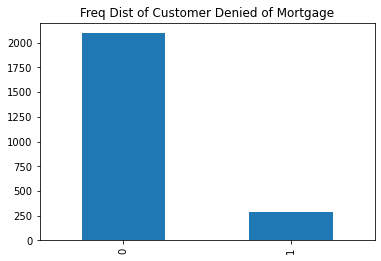

In [135]:
%matplotlib inline

bplt = prep_df['Deny'].value_counts().plot.bar(title = "Freq Dist of Customer Denied of Mortgage")
bplt;

Very few customers are denied of mortgage.

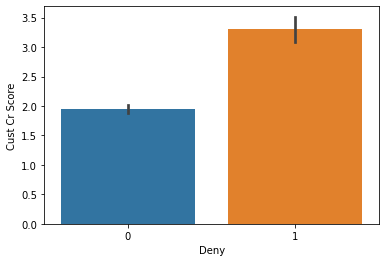

In [136]:
sns.barplot(x = 'Deny', y = 'Cust Cr Score', data = prep_df)
plt.show()

Credit score and denial of loan are highly related to each other.

Text(0, 0.5, 'Frequency')

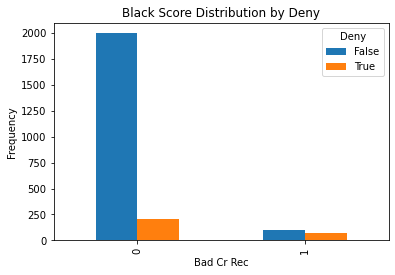

In [147]:
# barplot of Bad Cr Rec grouped by Deny of Mortgage (True or False)

pd.crosstab(prep_df['Bad Cr Rec'], prep_df['Deny'].astype(bool)).plot(kind='bar')
plt.title('Black Score Distribution by Deny')
plt.xlabel('Bad Cr Rec')
plt.ylabel('Frequency')


This graph shows that, customer with good credit record have higher chances of securing mortgage. 

Text(0, 0.5, 'Frequency')

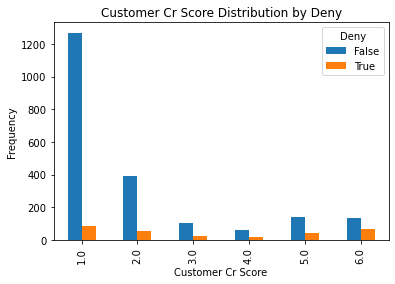

In [148]:
# barplot of Customer Cr Score grouped by Deny of Mortgage (True or False)

pd.crosstab(prep_df['Cust Cr Score'], prep_df['Deny'].astype(bool)).plot(kind='bar')
plt.title('Customer Cr Score Distribution by Deny')
plt.xlabel('Customer Cr Score')
plt.ylabel('Frequency')

This graph shows us that lower the customer credit score, more the applicants are denied of mortgage. 

<AxesSubplot:>

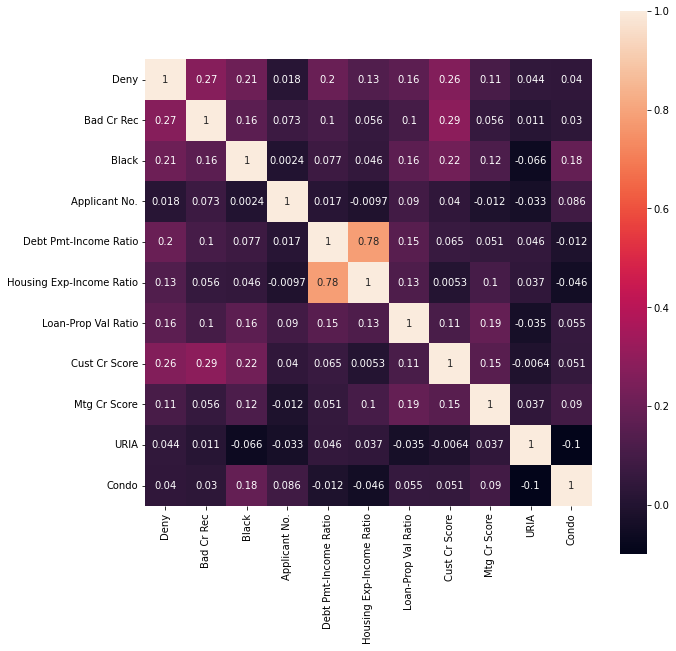

In [143]:
# Correlation Map of our NON-CATEGORICAL DATA

corr = prep_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

### Second EDA Conclusion

Depending upon the corelation matrix graph, we can simply drop some of the following which have wither very high corelation ratio or very low. 

We are comparint each variable with "Deny". If we were to drop anything less than 0.2 and more than 0.7, following would be the ones to be dropped:
- Condo: 0.04
- Debt payment to income ratio: 0.2
- Housing Exp to income ratio: 0.13
- Loan to property valuation ratio: 0.16
- Mortgage creedit score: 0.11
- Applicants job industry's unemployment rate: 0.044

Our initial estimation of features to be selected for analysis seem to make sense depending upon this graph of corelation. We are left with Bad Credit Score, race "Black", Credit Score as very high factor for mortgage denial. 

## Regression Modeling: 

In this step we will be doing the following things with our data: 
- we will include our feature selection technique. 
- present our regression modeling work
- interpretation of the coefficients of the models generated
- analyze them to see if they make sense

### Feature Selection

If I were to pick any 3 features, depending on my domain knowledge and what the EDA suggests, I would select the following 3 features: 
- Bad credit record
- Customer credit score
- Black

However, lets employ a feature selection model and see if my intuition makes sensse or not. 

#### K-Best with an F-Regression

An F-test is any statistical test in which the test statistic has an F-distribution under the null hypothesis. It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. (Wiki)

In [150]:
# making sure the data looks fine before moving on with feature selection
prep_df.head()

,Deny,Bad Cr Rec,Black,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,Denied Mtg Ins,Self Emp,Single,URIA,Condo
1,0,0,0,1.0,0.221,0.221,0.800000,5.0,2.0,no,no,no,3.9,0
2,0,0,0,2.0,0.265,0.265,0.921875,2.0,2.0,no,no,yes,3.2,0
3,0,0,0,3.0,0.372,0.248,0.920398,1.0,2.0,no,no,no,3.2,0
4,0,0,0,4.0,0.320,0.250,0.860465,1.0,2.0,no,no,no,4.3,0
5,0,0,0,5.0,0.360,0.350,0.600000,1.0,1.0,no,no,no,3.2,0


#### Selecting numeric columns: 

In [151]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 1 to 2380
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Deny                      2380 non-null   uint8  
 1   Bad Cr Rec                2380 non-null   uint8  
 2   Black                     2380 non-null   uint8  
 3   Applicant No.             2380 non-null   float64
 4   Debt Pmt-Income Ratio     2380 non-null   float64
 5   Housing Exp-Income Ratio  2380 non-null   float64
 6   Loan-Prop Val Ratio       2380 non-null   float64
 7   Cust Cr Score             2380 non-null   float64
 8   Mtg Cr Score              2380 non-null   float64
 9   Denied Mtg Ins            2380 non-null   object 
 10  Self Emp                  2380 non-null   object 
 11  Single                    2380 non-null   object 
 12  URIA                      2380 non-null   float64
 13  Condo                     2380 non-null   int64  
dtypes: float

In [152]:
#check the numeric columns

numeric_columns = list(prep_df.select_dtypes(include=['float64','int64', 'uint8']).columns)
print(numeric_columns)

['Deny', 'Bad Cr Rec', 'Black', 'Applicant No.', 'Debt Pmt-Income Ratio', 'Housing Exp-Income Ratio', 'Loan-Prop Val Ratio', 'Cust Cr Score', 'Mtg Cr Score', 'URIA', 'Condo']


In [153]:
#select numeric columns

numeric_mortgage = prep_df[numeric_columns].copy()

print(numeric_columns,'\n')
print(numeric_mortgage.head())

['Deny', 'Bad Cr Rec', 'Black', 'Applicant No.', 'Debt Pmt-Income Ratio', 'Housing Exp-Income Ratio', 'Loan-Prop Val Ratio', 'Cust Cr Score', 'Mtg Cr Score', 'URIA', 'Condo'] 

   Deny  Bad Cr Rec  Black  Applicant No.  Debt Pmt-Income Ratio  \
1     0           0      0            1.0                  0.221   
2     0           0      0            2.0                  0.265   
3     0           0      0            3.0                  0.372   
4     0           0      0            4.0                  0.320   
5     0           0      0            5.0                  0.360   

   Housing Exp-Income Ratio  Loan-Prop Val Ratio  Cust Cr Score  Mtg Cr Score  \
1                     0.221             0.800000            5.0           2.0   
2                     0.265             0.921875            2.0           2.0   
3                     0.248             0.920398            1.0           2.0   
4                     0.250             0.860465            1.0           2.0   
5        

In [155]:
# code from professors note
# 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

target = numeric_mortgage['Deny']
features = numeric_mortgage.drop('Deny',axis=1).copy()
feature_names = list(features.columns)

selection_kBest = SelectKBest(f_regression,k = 5).fit(features,target)

#find which columns were chosen
features_kbest = selection_kBest.get_support()
print("Overall features: ", numeric_mortgage.columns,'\n')
print("Chosen features: ", features.columns[features_kbest],'\n')

selection_kBest.scores_

Overall features:  Index(['Deny', 'Bad Cr Rec', 'Black', 'Applicant No.', 'Debt Pmt-Income Ratio',
       'Housing Exp-Income Ratio', 'Loan-Prop Val Ratio', 'Cust Cr Score',
       'Mtg Cr Score', 'URIA', 'Condo'],
      dtype='object') 

Chosen features:  Index(['Bad Cr Rec', 'Black', 'Debt Pmt-Income Ratio', 'Loan-Prop Val Ratio',
       'Cust Cr Score'],
      dtype='object') 



array([191.39523794, 104.49006695,   0.76501434,  98.40628422,
        42.87189887,  64.27136252, 175.79653732,  28.93863715,
         4.52794261,   3.73133512])

Our initial intuition was not bad if we compare to what we got from feature selection algorithm. The choosen coefficients generated by the algorithm are as follows: 

- Bad Cr Rec - bad credit record has 0.27 corelation score obtainer earlier in our EDA
- Black - black and deny has 0.21 corelation ratio
- Debt Pmt-Income Ratio - debt pament to income ratio has 0.20 corelation ratio
- Loan-Prop Val Ratio - loan to property valuation ratio is 0.16 
- Cust Cr Score - customer credit score has 0.26 corelation ratio, based on our EDA

We picked 3 of the highest rated ones. 


#### Coefficient Interpretations

In [156]:
prep_df.groupby('Deny').mean()

,Bad Cr Rec,Black,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,URIA,Condo
Deny,,,,,,,,,,
0,0.047255,0.115990,1185.955609,0.322929,0.250603,0.727083,1.955131,1.699284,3.741909,0.281623
1,0.266667,0.336842,1223.905263,0.388771,0.290212,0.816379,3.301754,1.880702,4.014035,0.336842


We can see that on average, applicants with bad credit record are more likely to be denied of loans, same for customer credit score, customer credit score and if the applicant is black. 

In [157]:
prep_df.groupby('Black').mean()

,Deny,Bad Cr Rec,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,URIA,Condo
Black,,,,,,,,,,
0,0.092602,0.056345,1189.820676,0.327463,0.253532,0.725971,1.966193,1.694757,3.829201,0.254287
1,0.283186,0.176991,1194.589971,0.350989,0.266266,0.808848,3.020649,1.879056,3.445133,0.492625


If someone is black, there is a high possibility that they get denied for loan. 

In [159]:
prep_df.groupby('Cust Cr Score').mean()

,Deny,Bad Cr Rec,Black,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Mtg Cr Score,URIA,Condo
Cust Cr Score,,,,,,,,,,
1.0,0.062084,0.028825,0.093865,1183.405765,0.326638,0.256815,0.725442,1.679231,3.721360,0.292683
2.0,0.115646,0.052154,0.115646,1122.342404,0.327484,0.247073,0.735187,1.666667,3.992744,0.204082
3.0,0.182540,0.174603,0.214286,1262.182540,0.346406,0.250530,0.737880,1.738095,3.950794,0.269841
4.0,0.220779,0.025974,0.311688,1244.038961,0.314582,0.280821,0.743230,1.948052,3.525974,0.519481
5.0,0.230769,0.137363,0.230769,1320.631868,0.347202,0.258246,0.780560,1.785714,3.762088,0.280220
6.0,0.338308,0.318408,0.338308,1204.517413,0.347830,0.254240,0.785586,1.965174,3.649254,0.373134


On averge, a customer with bad credit score is more likely to get denied for mortgage, even more likely than if someone is Black.

In [160]:
prep_df.groupby('Bad Cr Rec').mean()

,Deny,Black,Applicant No.,Debt Pmt-Income Ratio,Housing Exp-Income Ratio,Loan-Prop Val Ratio,Cust Cr Score,Mtg Cr Score,URIA,Condo
Bad Cr Rec,,,,,,,,,,
0,0.094785,0.126531,1176.395918,0.327723,0.253809,0.732696,1.981406,1.712472,3.768118,0.284354
1,0.434286,0.342857,1368.211429,0.369754,0.274708,0.801777,3.817143,1.828571,3.854857,0.337143


Someone with bad credit record is more likely to get rejected for mortgage with 0.43, even more than customer credit score and being Black. 

### Regression Modeling Work

In [208]:
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


In [234]:
regr_df = prep_df.copy()

In [210]:
# # create X and y list

# X = regr_df[['Bad Cr Rec','Black', 'Debt Pmt-Income Ratio', 'Housing Exp-Income Ratio', 'Loan-Prop Val Ratio', 'Cust Cr Score', 'Mtg Cr Score', 'URIA', 'Condo']]

# y = regr_df['Deny']

In [235]:
# create X and y list

X = regr_df[['Bad Cr Rec','Black',  'Debt Pmt-Income Ratio', 'Housing Exp-Income Ratio', 'Loan-Prop Val Ratio', 'Cust Cr Score']]

y = regr_df['Deny']

In [236]:
# splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [237]:
# creating and training linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#### Linear regression model evaluation

In [238]:
# Linear Regression Model Evaluation

print(lr.intercept_)

-0.25044242938510763


In [239]:
# create coefficient relation

coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Bad Cr Rec,0.213093
Black,0.113650
Debt Pmt-Income Ratio,0.289080
Housing Exp-Income Ratio,0.115419
Loan-Prop Val Ratio,0.201468
Cust Cr Score,0.033459


The linear regression modelel generated above makes sense but is somehow different than what was expected from the EDA works. The 

- the feature that matter the most is Debt Pmt-Income Ratio, which was included in preliminary EDA but was a little lower rate
- debt-pmt-income ratio is the most significant attribute on denial of loan
- second largest reason for loan denial and acceptance became the Bad Credit Record of the mortgage applicant
- loan-prop val ratio - loan to property valuation ratio is the third largest feature that matter on acceptance or denial of loan
- an individuals race also seem to matter a lot when it comes to loan acceptance/denial, "Black" became the fourth largest reason

The data makes sense because these features are identified as some major factor in loan acceptance/denial, but they had different magnitude.

In [240]:
predictions = lr.predict(X_test)


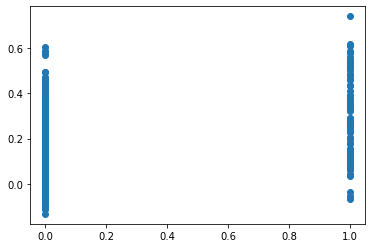

In [241]:
plt.scatter(y_test, predictions)

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


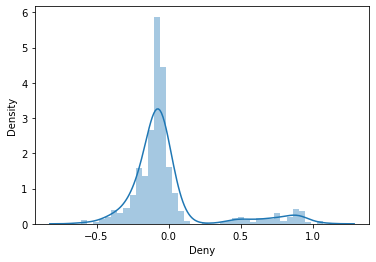

In [242]:
sns.distplot((y_test-predictions),bins=40);

The denial of loan is much less, which is relatively alligned to our original data. This curve gives somehow normally distributed data. 

In [243]:
# is not a requirement of our assignment, keeping for future reference

# Mean Absolute Error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

# Mean Square Error
print('MSE:', metrics.mean_squared_error(y_test, predictions))

# Root Mean Square Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.18153819030331492
MSE: 0.08194009016775347
RMSE: 0.2862517950472162


## Conclusion: 

Having done the analysis of the data following conclusion can be drawn: 
- Debt payment to income ratio is the number 1 reason or the factor that impacts the morgrage denial/ acceptnce
- the initial analsis of customer credit score being top reason for housing loan came to be less important according to this analysis
- The initial prediction of bad credit record being an attribute that impacted on loan denial was still true till the final analysis. 

The EDA, feature selection, test and training modle all impacts the end result. It would be interesting to see how, other approaches of selecting testing and training data, data preparation, regression modeling and feature selection can be done, which might lead to different result. 



References:


https://github.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/blob/master/Linear%20Regression%20Model.ipynb